In [19]:
import os
import toml
import json

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
basepath = '/Users/yngtodd/src/ornl/bayescache/examples/experiments'

# History
cached_history = os.path.join(basepath, 'cached_adadelta_4_29/history_cache.toml')
noncached_history = os.path.join(basepath, 'noncached_4_28/history_cache.toml')

# Optimization Results
cached_results = os.path.join(basepath, 'cached_adadelta_4_29/bayes_cache_checkpoint')
noncached_results = os.path.join(basepath, 'noncached_4_28/bayes_cache_checkpoint')

In [8]:
def percent_difference(cached, noncached):
    """"""
    cached_time = np.sum(cached['Runtime'])
    noncached_time = np.sum(noncached['Runtime'])   
    diff = abs(cached_time - noncached_time)
    avg = (cached_time + noncached_time) / 2 
    return (diff / avg) * 100

In [9]:
with open(cached_history, 'r') as infile:
    cached = toml.load(infile)
    
with open(noncached_history, 'r') as infile:
    noncached = toml.load(infile)
    
with open(cached_results, 'r') as infile:
    res_cached = json.load(infile)
    
with open(noncached_results, 'r') as infile:
    res_noncached = json.load(infile)

In [34]:
for key, value in cached.items():
    print(key)

Title
Date
NumEpochs
StopEpoch
Runtime
TrainLoss
ValidationLoss


In [37]:
np.sum(cached['NumEpochs'][:12])

129

In [10]:
print(f"Runtime for cached version: {np.sum(cached['Runtime'])/60} minutes")
print(f"Runtime for non-cached version: {np.sum(noncached['Runtime'])/60} minutes")

Runtime for cached version: 436.7083467245102 minutes
Runtime for non-cached version: 353.2217027306557 minutes


In [11]:
percent_difference(cached, noncached)

21.13773087919299

In [12]:
print(f"Minimum found by cached version: {res_cached['fun']}")
print(f"Minimum found by non-cached version: {res_noncached['fun']}")

Minimum found by cached version: 0.03076
Minimum found by non-cached version: 0.18715


In [13]:
print(f"Final hyperparameters found by cached version: {res_cached['x']}")
print(f"Final hyperparameters found by noncached version: {res_noncached['x']}")

Final hyperparameters found by cached version: [5, 3]
Final hyperparameters found by noncached version: [6, 5]


## Learning Curves

In [14]:
np.argmin(res_cached['func_vals'])

0

In [11]:
np.argmin(res_noncached['func_vals'])

8

In [15]:
cached_data_trainloss = pd.DataFrame()
cached_data_validloss = pd.DataFrame()
noncached_data_trainloss = pd.DataFrame()
noncached_data_validloss = pd.DataFrame()

In [16]:
cached_data_trainloss['cached_trainloss'] = cached['TrainLoss'][0]

In [17]:
cached_data_validloss['cached_validloss'] = cached['ValidationLoss'][0]

In [15]:
noncached_data_trainloss['noncached_trainloss'] = noncached['TrainLoss'][8]

In [16]:
noncached_data_validloss['noncached_validloss'] = noncached['ValidationLoss'][8]

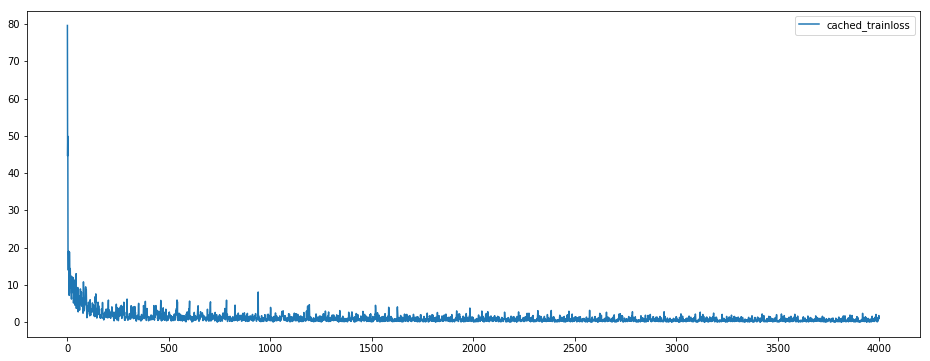

In [20]:
# Plot the responses for different events and regions
plt.figure(figsize=(16, 6))
sns.lineplot(data=cached_data_trainloss)

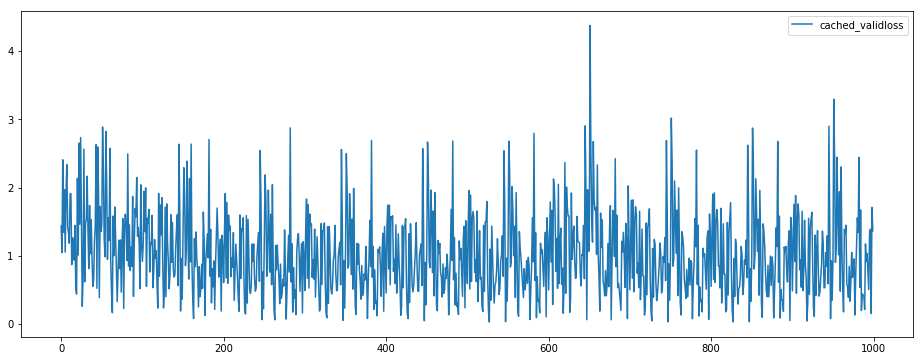

In [21]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=cached_data_validloss)

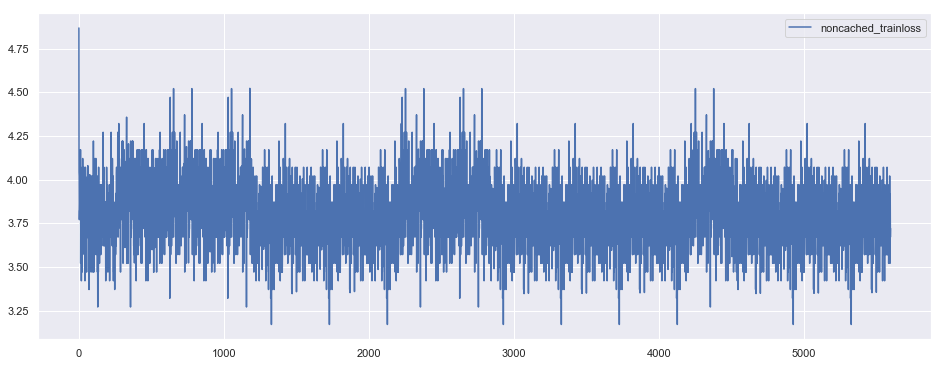

In [32]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=noncached_data_trainloss)

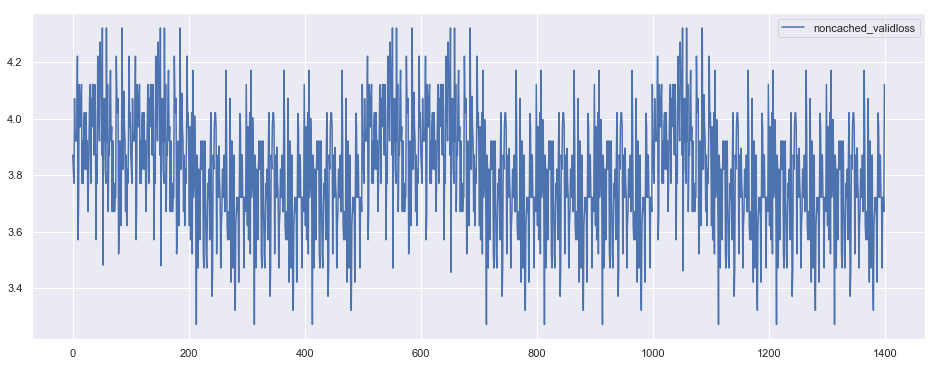

In [33]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=noncached_data_validloss)